In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('spam_or_ham.csv')

Why the name? “Bayes” is named from the famous Bayes’ Theorem in probability, and “Naive” is because the assumptions of this algorithm are very simple and most of the time not true.

Naive Bayes belongs til the family of algorithms which are supervised and classification algorithms. 

In this example we are going to use the Naive Bayes classification algorithm to classify text. 

In this context we ae going to classify text on a binary variable rather the text is of type **ham** or **spam**


We are going to use training examples to estimate this. We are going to consider that all words are independent, for simplicity, though in reality words may have a direct coherence.

The Naive Bayes conditional independece asumption: 

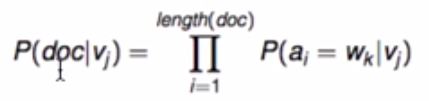


The first thing we are going to do, is to distingush between all the unique words in our **feature vector**  
In an exmample of movie reviews, we have **two features** the classification, and the text, where we take unique words in the text: 

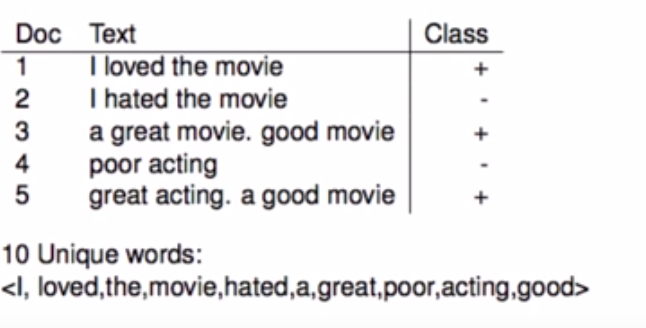

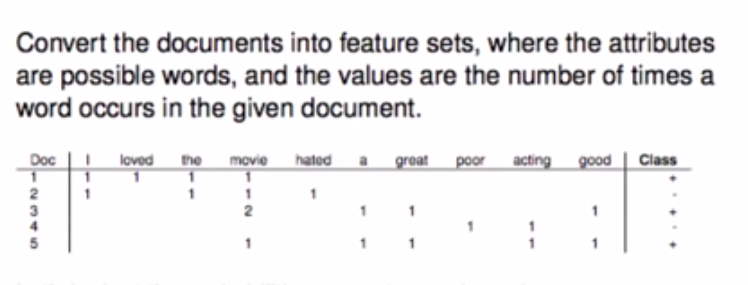

Here we have a **feature set** / **vector** where each attribute are possible words and the corresponding values are the number of times a word occurs in the given document

In [6]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [7]:
df['text'].isna().sum() # all entries are ok

0

In [8]:
df.text.str.len().sort_values()

2348      2
1897      2
3821      2
843       2
2271      3
       ... 
5278    574
398     588
3521    588
2045    790
312     910
Name: text, Length: 5559, dtype: int64

In [9]:
df.text[312]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [10]:
#some very long text pieces

In [27]:
#First we need to encode spam and ham, into numeric values, so that our algorithm can make a binary classification
df['type'] = df['type'].replace(['ham'], 0)
df['type'] = df['type'].replace(['spam'], 1)

In [28]:
df

,type,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...
...,...,...
5554,0,You are a great role model. You are giving so ...
5555,0,"Awesome, I remember the last time we got someb..."
5556,1,"If you don't, your prize will go to another cu..."
5557,1,"SMS. ac JSco: Energy is high, but u may not kn..."


In [29]:
from sklearn.model_selection import train_test_split
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['type'],random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
#Train and evaluate the model
vect = CountVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)
clfrNB = MultinomialNB(alpha = 0.1)
clfrNB.fit(X_train_vectorized, y_train)
preds = clfrNB.predict(vect.transform(X_test))
score = roc_auc_score(y_test, preds)
print(score)
#0.9717347794270871

0.9717347794270871


In [30]:
#Not bad for a simple modle like this

In [38]:
#test case
test_feature = ["Get your prize today at Kristoffersservice.com"]
prediction = clfrNB.predict(vect.transform(test_feature))
print(prediction)
#Classified as spam 

[1]


In [48]:
test_feature1 = ["Hey how are you doing?"]
prediction = clfrNB.predict(vect.transform(test_feature1))
print(prediction)
#Not spam worked as expected

[0]
